In [10]:
import pandas
import array
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
#plot condusion matrix
def plot_confusion_matrix2(cm_input, title='Normalized Confusion Matrix'):
    labels=['phishing','legitimate']
    cm = cm_input.astype('float') / cm_input.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.text(-0.15,0.05, '%.3f' %cm[0][0],fontsize=14,color = 'w')
    plt.text(0.8,0.05, '%.3f' %cm[0][1],fontsize=14,color = 'k')
    plt.text(-0.15,1.05, '%.3f' %cm[1][0],fontsize=14,color = 'k')
    plt.text(0.8,1.05, '%.3f' %cm[1][1],fontsize=14,color = 'w')
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    np.set_printoptions(precision=2)
    # show confusion matrix
    plt.show()

In [4]:
#loading data
data_X=pandas.read_csv(r"data_X.csv",header = None)
data_y=pandas.read_csv(r"data_y.csv",header = None)

#Balancing data
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(data_X, data_y)

#reshaping data
X_res=X_res.values
y_res=y_res.values.ravel()

#split test and train data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

Accuracy: 0.8585872112487446


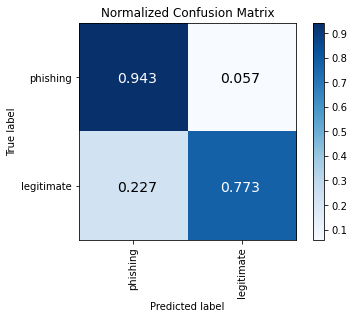

In [5]:
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc=clf.score(X_test, y_test)
print('Accuracy:',acc)
plot_confusion_matrix2(cm)

In [7]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [11]:
n_neighbors=[3,4,6,7,9,12]
leaf_size=[10,20,30,50]
weights=['uniform','distance']
param=dict(n_neighbors=n_neighbors, leaf_size=leaf_size, weights=weights)

model= KNeighborsClassifier()
grid_search=GridSearchCV(model,param,n_jobs=-1,verbose=1)
clf_grid=grid_search.fit(X_train,y_train)



Fitting 5 folds for each of 48 candidates, totalling 240 fits


NameError: name 'test_X' is not defined

In [12]:
pred_test2=clf_grid.predict(X_test)
acc2=accuracy_score(y_test,pred_test2)
accuracy_score(y_test,pred_test2)

clf_grid.best_params_

{'leaf_size': 10, 'n_neighbors': 4, 'weights': 'distance'}

The best accuracy:  0.895


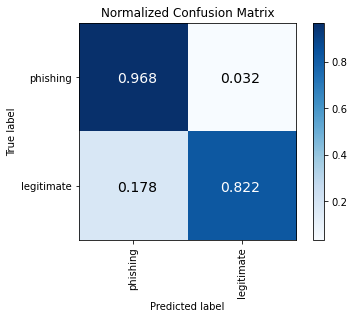

In [15]:
accc=accuracy_score(y_test,pred_test2)
print('The best accuracy: ','%.3f'%accc)
cm_best = confusion_matrix(y_test, pred_test2)
plot_confusion_matrix2(cm_best)